In [13]:

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from warnings import filterwarnings 
filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [10]:
recruits = pd.read_csv('data/recruitment.csv', index_col=0)
recruits.head()


,value
1950-01-01,68.63
1950-02-01,68.63
1950-03-01,68.63
1950-04-01,68.63
1950-05-01,68.63


In [14]:
# Split data set to train and test
y_hist, y_future =  train_test_split(recruits,shuffle=False)

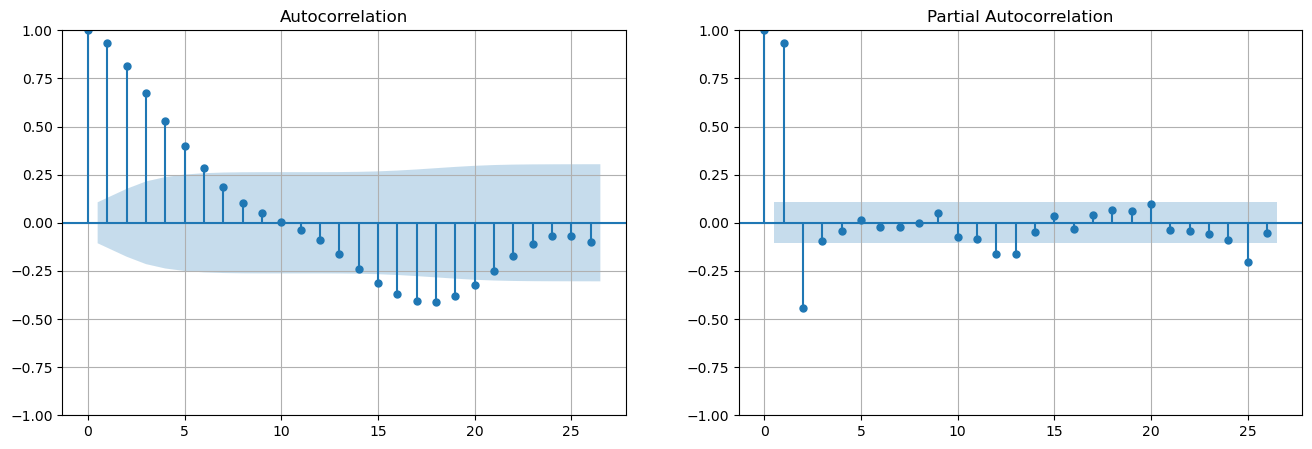

In [15]:
#Plot ACF and PACF to figure out p and  q
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
plot_acf(y_hist, ax = ax[0])
ax[0].grid()
plot_pacf(y_hist, ax = ax[1], method = 'ywm')
ax[1].grid()

In [16]:
#Below, the ACF and PACF plots are shown. While the ACF plot isn't incredibly helpful, 
# the PACF may suggest using a value of p = 1 in an ARMA model. 
# As such, create and fit an ARIMA model with p = 1 and q = 1. 
# Assign your fit model as arma below.
y_hist.index = pd.to_datetime(y_hist.index)

p=1
q=1
# 0 refers to I in ARIMA
# setting this to sum number d causes the model to first take d differences in inout data in ordet to achieve stationary
arma = ARIMA(y_hist['value'],order=(p,0,q)).fit()

In [17]:
#predict
hist_preds = arma.predict()     
print(hist_preds.tail())


1977-11-01    100.628693
1977-12-01     93.700356
1978-01-01     96.456426
1978-02-01     84.710623
1978-03-01     73.198915
Freq: MS, Name: predicted_mean, dtype: float64


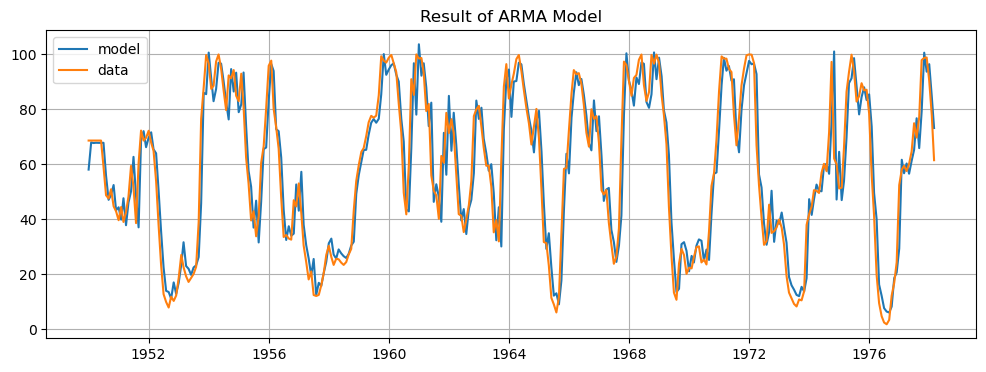

In [18]:
# Plot the prediction vs actual y_hist
plt.figure(figsize = (12, 4))
plt.plot(hist_preds, label = 'model')
plt.plot(y_hist, label = 'data')
plt.legend()
plt.grid()
plt.title('Result of ARMA Model');

In [19]:
#Forecasting with the ARMA model
#To use the forecasting capabilities of the model, pass the number of steps to forecast in the future. 
# Assign the forecast into the future to match up with y_future values as future_preds below.
future_preds = arma.forecast(steps=len(y_future))